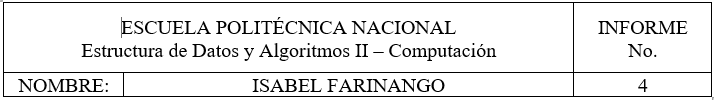

# ***EJERCICIOS GRAFOS***

***1. OBJETIVOS*** 

* Comprender e implementat el algoritmo de búsqueda en amplitud (BFS) mediante la resolución de los ejercicios prácticos planteados, utilizando Python y estructuras como listas, diccionarios, colas y árboles, finalmente para visualizar el comportamiento del algoritmo.

***2. INTRODUCCIÓN***

El algoritmo de búsqueda en amplitud (BFS) es una de las técnicas fundamentales en la teoría de grafos, este método de exploración sistemática permite recorrer todos los nodos de un grafo nivel por nivel, visitando primero los vecinos más cercanos antes de avanzar a nodos más distantes. BFS tiene aplicaciones como por ejemplo encontrar la ruta más corta en un mapa hasta gestionar tareas pendientes, son simples y eficaces utilizando una estructura de cola que garantiza que el grafo se explore de manera ordenada y predecible. 

Los primeros ejercicios a realizar ayuda a familiarizar con las estrucutras de datos esenciales, manejar una lista de tareas pendientes usando diccionarios para buscar el estado de completitud y se analiza datos de una nómina mensual donde se aplica funciones de búsqueda de máximos, mínimos y promedios. Luego estan los otros ejercicos donde se implementan BFS de forma detallada, donde se visualiza el proceso y resultado.

***3. PROBLEMAS PLANTEADOS Y SOLUCIÓN***

Para los dos ejercicios a continuación crea programas en Python utilizando JupyterLab, en lo posible usa funciones, listas, diccionarios, declaraciones de control de decisión y de repetición:_

_3.1 Te estás preparando para el fin del semestre y haces una lista de tipo “TO-DOs” para preparar todas las actividades, como por ejemplo: “Proyecto Final EDA2”, “Examen SO”, “Examen ArquitecturaC”, “Presentación Informe BDD Distribuidas”, etc. Has un programa que barra la lista de actividad en actividad y tú puedas indicar si está listo o no (check o no). Si hay una actividad con “check”, que ya no se muestre la próxima vez que revisas tu lista de TO-DOs_    

In [1]:
tareas = {
    "Proyecto Final EDA2": False,
    "Examen SO": False,
    "Examen ArquitecturaC": False,
    "Presentación Informe BDD Distribuidas": False
}

def mostrar_pendientes(tareas):
    pendientes = [t for t, done in tareas.items() if not done]
    if not pendientes:
        print("✓ Todas las tareas completadas")
        return
    print("\nTAREAS PENDIENTES:")
    for i, tarea in enumerate(pendientes, 1):
        print(f"{i}. {tarea}")

def marcar_completada(tareas, numero):
    pendientes = [t for t, done in tareas.items() if not done]
    if 1 <= numero <= len(pendientes):
        tareas[pendientes[numero - 1]] = True
        print(f"✓ '{pendientes[numero - 1]}' completada!")

mostrar_pendientes(tareas)
marcar_completada(tareas, 1)
mostrar_pendientes(tareas)
marcar_completada(tareas, 2)
mostrar_pendientes(tareas)


completadas = sum(tareas.values())
print(f"\nProgreso: {completadas}/{len(tareas)} ({completadas/len(tareas)*100:.0f}%)")


TAREAS PENDIENTES:
1. Proyecto Final EDA2
2. Examen SO
3. Examen ArquitecturaC
4. Presentación Informe BDD Distribuidas
✓ 'Proyecto Final EDA2' completada!

TAREAS PENDIENTES:
1. Examen SO
2. Examen ArquitecturaC
3. Presentación Informe BDD Distribuidas
✓ 'Examen ArquitecturaC' completada!

TAREAS PENDIENTES:
1. Examen SO
2. Presentación Informe BDD Distribuidas

Progreso: 2/4 (50%)


---

_3.2 Cada mes tu empresa hace pagos de salarios de los trabajadores. Puedes ingresar los elementos quemados en un diccionario {mes:pago}. Haz un programa que permita verificar en qué mes se pagó más y el valor, en qué mes se pagó menos y el valor, y finalmente el promedio de pago de salarios en el año._

In [2]:
pagos = {
    "Enero": 45000, "Febrero": 47000, "Marzo": 46500,
    "Abril": 48000, "Mayo": 49500, "Junio": 50000,
    "Julio": 48500, "Agosto": 47500, "Septiembre": 46000,
    "Octubre": 48000, "Noviembre": 49000, "Diciembre": 52000
}

mes_max = max(pagos, key=pagos.get)
mes_min = min(pagos, key=pagos.get)
promedio = sum(pagos.values()) / len(pagos)

print("ANÁLISIS DE PAGOS DE SALARIOS")
print("-" * 50)
print(f"\nMES CON MAYOR PAGO: {mes_max} - ${pagos[mes_max]:,.2f}")
print(f"MES CON MENOR PAGO: {mes_min} - ${pagos[mes_min]:,.2f}")
print(f"PROMEDIO ANUAL: ${promedio:,.2f}")
print(f"TOTAL ANUAL: ${sum(pagos.values()):,.2f}")
print(f"\nDiferencia máx-mín: ${pagos[mes_max] - pagos[mes_min]:,.2f}")

ANÁLISIS DE PAGOS DE SALARIOS
--------------------------------------------------

MES CON MAYOR PAGO: Diciembre - $52,000.00
MES CON MENOR PAGO: Enero - $45,000.00
PROMEDIO ANUAL: $48,083.33
TOTAL ANUAL: $577,000.00

Diferencia máx-mín: $7,000.00


---

_3.3 Dado el siguiente grafo, implemente el algortimo BSF donde se responda a las preguntas:_

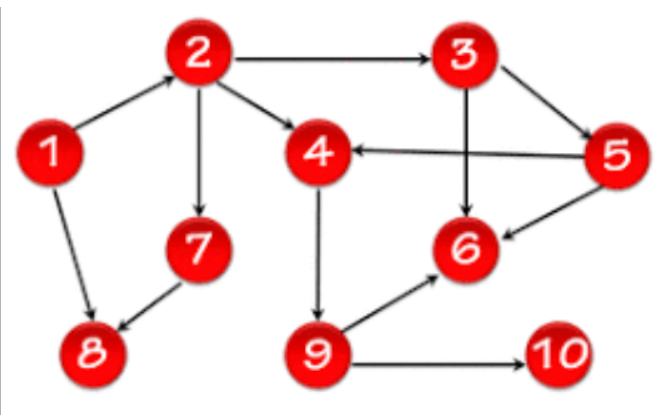

In [3]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

grafo = {
    1: [2, 8], 2: [3, 4, 7], 3: [5, 6], 4: [6, 9],
    5: [6], 6: [], 7: [], 8: [], 9: [10], 10: []
}

def bfs(grafo, inicio, destino=None):
    cola = deque([(inicio, [inicio])])
    visitados = set()
    arbol = {}
    
    while cola:
        nodo, camino = cola.popleft()
        if nodo == destino:
            return camino, arbol
        if nodo in visitados:
            continue
        visitados.add(nodo)
        arbol[nodo] = []
        for vecino in grafo[nodo]:
            if vecino not in visitados:
                arbol[nodo].append(vecino)
            cola.append((vecino, camino + [vecino]))
    return None, arbol

camino, arbol = bfs(grafo, 1, 6)

print("a) ¿Existe camino 1→6?:", "Sí" if camino else "No")
print(f"b) Ruta más corta: {' → '.join(map(str, camino))} (Longitud: {len(camino)-1})")
print("c) Árbol BFS:", {k:v for k,v in arbol.items() if v})


a) ¿Existe camino 1→6?: Sí
b) Ruta más corta: 1 → 2 → 3 → 6 (Longitud: 3)
c) Árbol BFS: {1: [2, 8], 2: [3, 4, 7], 3: [5, 6], 4: [6, 9], 5: [6]}


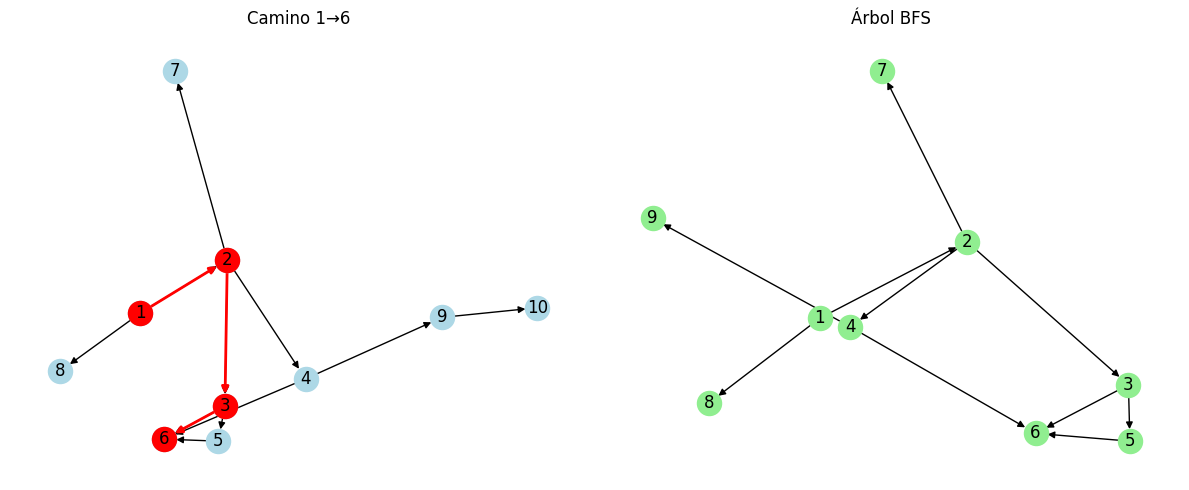

In [4]:
G = nx.DiGraph([(n, v) for n, vs in grafo.items() for v in vs])
pos = nx.spring_layout(G, seed=42)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

nx.draw(G, pos, with_labels=True, node_color='lightblue', ax=ax1, arrows=True)
nx.draw_networkx_nodes(G, pos, camino, node_color='red', ax=ax1)
nx.draw_networkx_edges(G, pos, [(camino[i], camino[i+1]) for i in range(len(camino)-1)], 
                       edge_color='red', width=2, ax=ax1)
ax1.set_title("Camino 1→6")
ax1.axis('off')

G_arbol = nx.DiGraph([(n, h) for n, hs in arbol.items() for h in hs])
nx.draw(G_arbol, nx.spring_layout(G_arbol, seed=42), with_labels=True, 
        node_color='lightgreen', ax=ax2, arrows=True)
ax2.set_title("Árbol BFS")
ax2.axis('off')

plt.tight_layout()
plt.show()

---

_3.4 Genera el árbol BFS (BFS Tree) para el siguiente grafo G, sabiendo que el nodo de inicio es 0. Ese sería el componente conectado que contiene al nodo 0. Implementa el algoritmo BFS y usa las estructuras auxiliares necesarias._

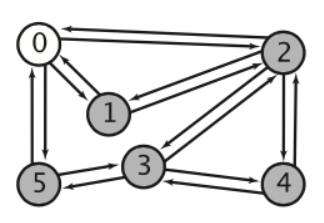 

In [5]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

grafo = {0: [1,2,5], 1: [2,3], 2: [3,4], 3: [4,5], 4: [5], 5: [0,3]}

def bfs(grafo, inicio):
    cola = deque([inicio])
    marked = {n: False for n in grafo}
    edgeTo = {n: None for n in grafo}
    marked[inicio] = True
    
    while cola:
        nodo = cola.popleft()
        for vecino in grafo[nodo]:
            if not marked[vecino]:
                marked[vecino] = True
                edgeTo[vecino] = nodo
                cola.append(vecino)
    
    return marked, edgeTo

marked, edgeTo = bfs(grafo, 0)

print("TABLA RESUMEN BFS")
print(f"{'Nodo':<8} {'Marked':<10} {'EdgeTo':<10} {'Adyacentes'}")
print("-" * 45)
for n in sorted(grafo.keys()):
    m = 'T' if marked[n] else 'F'
    e = str(edgeTo[n]) if edgeTo[n] is not None else '-'
    adj = ' '.join(map(str, grafo[n]))
    print(f"{n:<8} {m:<10} {e:<10} {adj}")

arbol = {p: [n for n, padre in edgeTo.items() if padre == p] for p in grafo}
print("\nÁrbol BFS:", {k:v for k,v in arbol.items() if v})


TABLA RESUMEN BFS
Nodo     Marked     EdgeTo     Adyacentes
---------------------------------------------
0        T          -          1 2 5
1        T          0          2 3
2        T          0          3 4
3        T          1          4 5
4        T          2          5
5        T          0          0 3

Árbol BFS: {0: [1, 2, 5], 1: [3], 2: [4]}


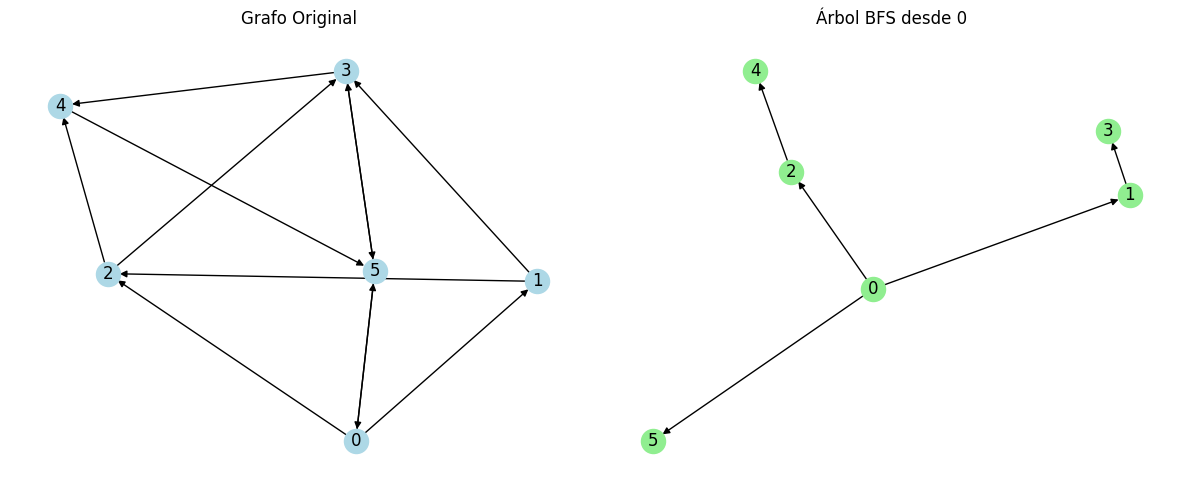

In [6]:

G = nx.DiGraph([(n, v) for n, vs in grafo.items() for v in vs])
G_arbol = nx.DiGraph([(p, h) for p, hs in arbol.items() for h in hs])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

nx.draw(G, nx.spring_layout(G, seed=42), with_labels=True, 
        node_color='lightblue', ax=ax1, arrows=True)
ax1.set_title("Grafo Original")
ax1.axis('off')

nx.draw(G_arbol, nx.spring_layout(G_arbol, seed=42), with_labels=True,
        node_color='lightgreen', ax=ax2, arrows=True)
ax2.set_title("Árbol BFS desde 0")
ax2.axis('off')

plt.tight_layout()
plt.show()

***4. CONCLUSIONES***

* La implementación del algoritmo BFS demuestra que es una herramienta útil para resolver problemas de búsqueda de caminos y generación de árboles de expansión en grafos. El uso de diccionarios para mapear estados, listas para almacenar secuencias ordenadas y funciones para modularizar la lógica ayudo mucho para comprender la complejidad del algoritmo BFS. 

***5. REFERENCIAS BIBLIOGRÁFICAS***

*Escuela Politécnica Nacional. (s.f.). Semana 4.1 Demo BFS [Material de clase]. Aulas Virtuales EPN. https://aulasvirtuales.epn.edu.ec/pluginfile.php/14773011/mod_resource/content/4/Semana4_1_Demo_BFS.pdf*

***6. DECLARACIÓN DE USO DE IA Y PROMPTS*** 

*6.1	Herramienta utilizada:* Claude

*6.2	Propósito del uso:* Para instalar un paquete de grafica y verificar parte de los codigos

*6.3	Prompts o instrucciones proporcionadas:*

    * Ayudame con un comando para ver si tengo instalado en el vscode : matplotlib versión y networkx versión
    * Para visualizar un grafo, puedes revisar este código 

link: https://claude.ai/share/74a82c75-21cd-4a2d-a159-a8e6cf989616 
  

*6.4	Uso del contenido generado:* Para instalación y revisión.

*6.5	Revisión y edición:* No, porque al ver el funcionamiento del código simplificado solo me mostraba una gráfica 

*6.6	Limitaciones y consideraciones éticas:* Ocupe para comprender la realización de los códigos parte por parte y para la instalación de paquetes. 


**Fecha de entrega** 29/10/2025